# Detection of Body Points

## Import from libraries

In [1]:
pip install google.colab

     |████████████████████████████████| 72 kB 552 kB/s            
  Preparing metadata (setup.py) ... - \ done
     |████████████████████████████████| 64 kB 1.2 MB/s            
     |████████████████████████████████| 104 kB 2.7 MB/s            
     |████████████████████████████████| 758 kB 3.1 MB/s            
     |████████████████████████████████| 8.0 MB 29.7 MB/s            
     |████████████████████████████████| 10.1 MB 60.3 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 57 kB 4.1 MB/s             
     |████████████████████████████████| 484 kB 45.0 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 245 kB 59.2 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 118 kB 60.3 MB/s            
     |████████████████████████████████| 133 kB 53.8 MB/s            
     |████████████████████████████████| 58 kB 4.3 MB/s         

In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


## Image loading

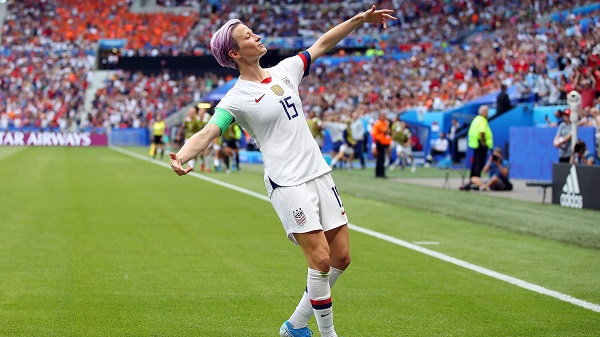

In [3]:
image = cv2.imread('../input/fotoss/megan.jpg')
cv2_imshow(image)

In [4]:
image.shape

(337, 600, 3)

In [5]:
type(image)

numpy.ndarray

In [6]:
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0/255, 
                                    size = (image.shape[1], image.shape[0]))

In [7]:
image_blob.shape 

(1, 3, 337, 600)

In [8]:
type(image_blob)

numpy.ndarray

## Trained neural network loading

- Caffe Deep Learning framework: https://caffe.berkeleyvision.org/

In [9]:
network = cv2.dnn.readNetFromCaffe('../input/caffe-deep-learning-freamework/pose_deploy_linevec_faster_4_stages.prototxt',  
                                   '../input/caffe-deep-learning-freamework/pose_iter_160000.caffemodel')

* Here are the convolutional networks within the trained file

In [10]:
network.getLayerNames() 

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [11]:
len(network.getLayerNames())

127

## Prediction of body points

In [12]:
network.setInput(image_blob)
output = network.forward()

In [13]:
output.shape

(1, 44, 43, 75)

In [14]:
width_position = output.shape[3]
position_height = output.shape[2]

In [15]:
width_position, position_height

(75, 43)

In [16]:
number_points = 15  
points = []   
threshold = 0.1   
for i in range(number_points):
  trust_map = output[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(trust_map)
  x = int((image.shape[1] * point[0]) / width_position)
  y = int((image.shape[0] * point[1]) / position_height)

  if confidence > threshold:
    cv2.circle(image, (x, y), 5, (0,255,0), thickness = -1)
    cv2.putText(image, '{}'.format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    points.append((x, y))
  else:
    points.append(None)

In [17]:
points

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

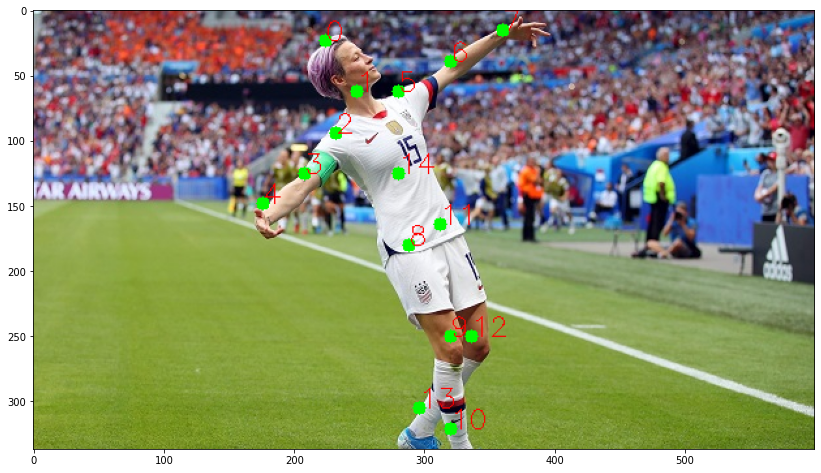

In [18]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [19]:
dot_connections = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1, 14],  # Fazemos a ligações entre os pontos;
                  [14,8], [8,9], [9,10], [14,11], [11,12],[12,13]]

In [20]:
dot_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [21]:
for connection in dot_connections:

  partA = connection[0]
  partB = connection[1]
  
  if points[partA] and points[partB]:
    cv2.line(image, points[partA], points[partB], (255,0,0))

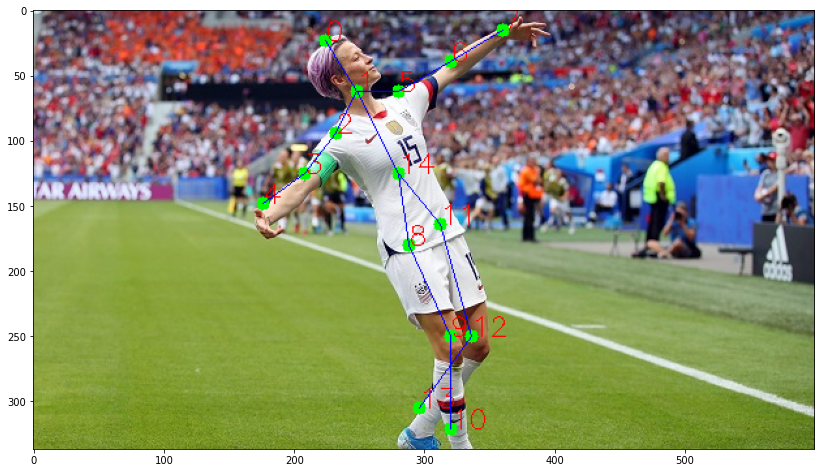

In [22]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

# Motion detection (arms above the head)

## Arms above your head in images

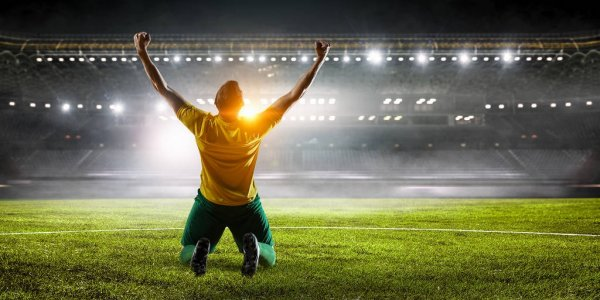

In [23]:
image2 = cv2.imread('../input/fotoss/player.jpg')
cv2_imshow(image2)

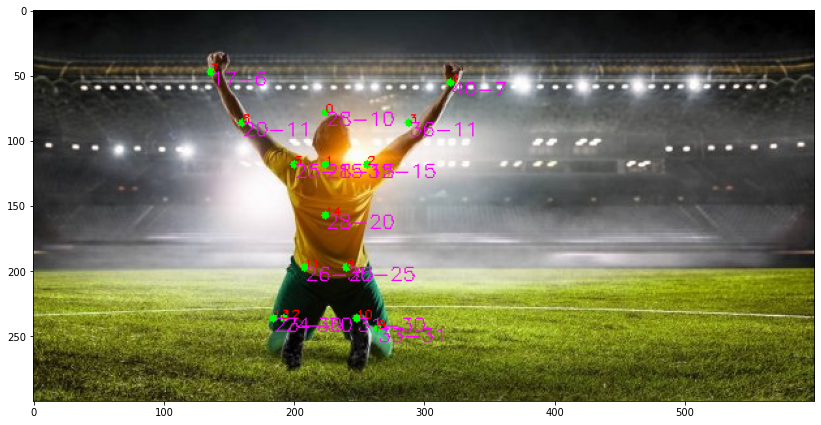

In [24]:
image2 = cv2.imread('../input/fotoss/player.jpg')
image_blob2 = cv2.dnn.blobFromImage(image = image2, scalefactor = 1.0 / 255, size = (image2.shape[1], image2.shape[0]))
network.setInput(image_blob2)
output2 = network.forward()
width_position = output2.shape[3]
position_height = output2.shape[2]
number_points = 15
points = []
threshold = 0.1
for i in range(number_points):
  trust_map = output2[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(trust_map) 
  x = int((image2.shape[1] * point[0]) / width_position)
  y = int((image2.shape[0] * point[1]) / position_height)
  
  if confidence > threshold:
    cv2.circle(image2, (x, y), 3, (0,255,0), thickness = -1)
    cv2.putText(image2, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
    cv2.putText(image2, '{}-{}'.format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,255))
    points.append((x, y))
  else:
    points.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB));

In [25]:
def check_arms_up(points):
  head, right_wrist, left_wrist = 0, 0, 0
  for i, ponto in enumerate(points):
    
    if i == 0:
      head = point[1]
    elif i == 4:
      right_wrist = point[1]
    elif i == 7:
      left_pulse = point[1]

  if right_wrist < head and left_pulse < head:
    return True
  else:
    return False

In [26]:
check_arms_up(points)

False

# **If you find this notebook useful, support with an upvote** 👍